# Data Scientist Associate 
## Example Practical Exam Solution

You can find the project information that accompanies this example solution in the resource center, [Practical Exam Resources](https://app.datacamp.com/certification/resource-center/practical-exam-resources).

Use this template to complete your analysis and write up your summary for submission.


## Task 1

The dataset contains **200 rows and 9 columns** with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:
 - Region: Same as description without missing values, 10 Regions.
 - Place name: Same as description without missing values.
 - Rating: 2 missing values, so I replace the missing values with 0.
 - Reviews: 2 missing values, so I replace the missing values with overall median number.
 - Price: Same as description without missing values, 3 categories.
 - Delivery option: Same as description without missing values.
 - Dine in option: 50+ missing values, so I replace missing values with 'False', and convert it into boolean data type.
 - Take out option: 50+ missing values, so I replace missing values with 'False',and convert it into boolean data type.
 
After the data validation, the dataset contains **200 rows and 9 columns.**
 

### Original Dataset

In [80]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
df = pd.read_csv('data/coffee.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


### Validate the categorical variables

In [81]:
cat = ['Region','Place type','Price','Delivery option','Dine in option','Takeout option']
for column in cat:
  print(df[column].value_counts())

C    20
J    20
F    20
B    20
A    20
E    20
D    20
G    20
I    20
H    20
Name: Region, dtype: int64
Coffee shop     97
Cafe            58
Others          25
Espresso bar    20
Name: Place type, dtype: int64
$$     194
$$$      4
$        2
Name: Price, dtype: int64
False    165
True      35
Name: Delivery option, dtype: int64
True    140
Name: Dine in option, dtype: int64
True    144
Name: Takeout option, dtype: int64


### Validate the numerical variables

In [82]:
df.describe()

,Rating,Reviews
count,198.000000,198.000000
mean,4.663636,622.494949
std,0.221648,1400.898666
min,3.900000,3.000000
25%,4.600000,47.500000
50%,4.700000,271.500000
75%,4.800000,786.250000
max,5.000000,17937.000000


### Check the missing values in the columns

In [83]:
df.isna().sum()

Region              0
Place name          0
Place type          0
Rating              2
Reviews             2
Price               0
Delivery option     0
Dine in option     60
Takeout option     56
dtype: int64

### Clean Rating and Review columns

In [84]:
df['Rating'] = df['Rating'].fillna(0)
median = np.median(df['Reviews'].dropna())
df['Reviews'] = df['Reviews'].fillna(median)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


### Clean Dine in Option and Takeaway Option column

In [85]:
df['Dine in option'] = df['Dine in option'].fillna(False)
df['Takeout option'] = df['Takeout option'].fillna(False)
df['Dine in option'] = df['Dine in option'].astype('bool')
df['Takeout option'] = df['Takeout option'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   200 non-null    bool   
 8   Takeout option   200 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 10.1+ KB


## Task 2

From  **Graph 1 Count of Rating**, the most number of stores were given rating 4.6, then follows by 4.7. We can see the majority of the stores were given rating higher than 4.5.

### Inspecting the Rating and Reviews variables

[Text(0.5, 1.0, 'Graph 1 The Count of Rating')]

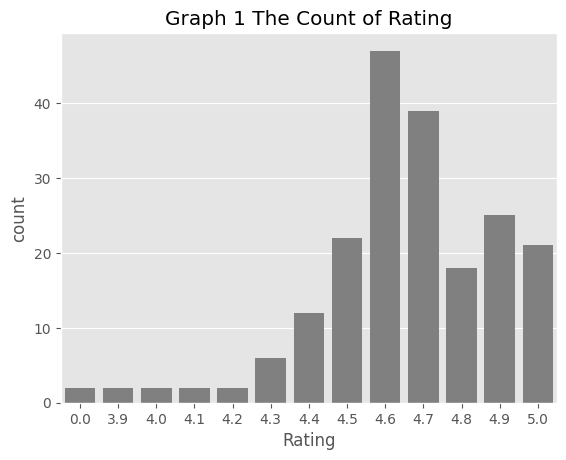

In [86]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data
style.use('ggplot')
sns.countplot(x=df['Rating'],color='gray').set(title='Graph 1 The Count of Rating')

## Task 3
Reviews variable is our target variable. From **Graph 2-1 The Distribution of Number of Reviews**, we can also see an outlier, larger than 17500. Since we don't have a lot of data, we decided to apply a log transformation. From Graph 2-2, we can see the distribution is much closer to a normal distribution.

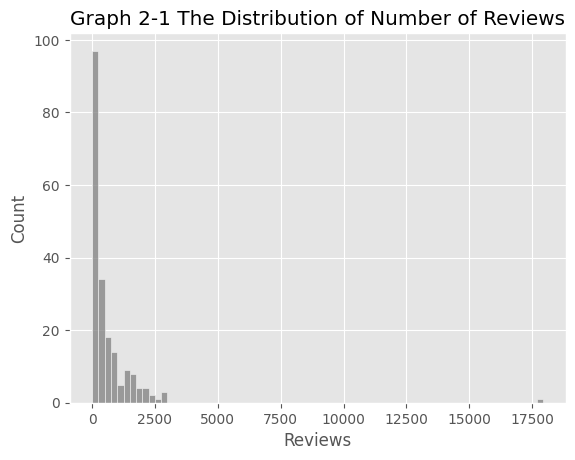

In [87]:
sns.histplot(x=df['Reviews'],color='gray').set(title='Graph 2-1 The Distribution of Number of Reviews');

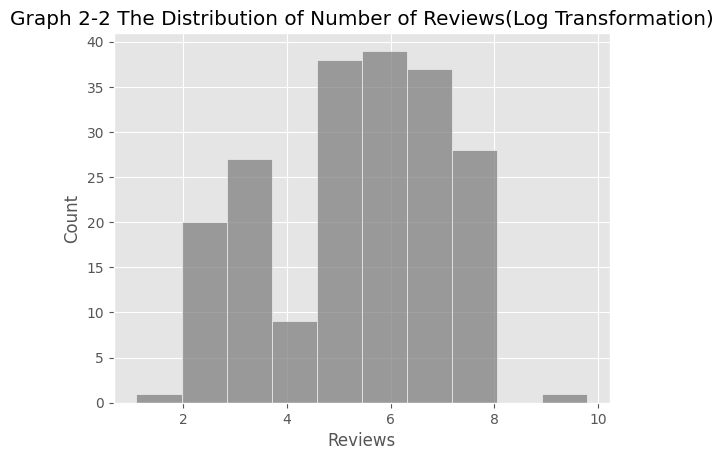

In [88]:
sns.histplot(x=np.log(df['Reviews']),color='gray').set(title='Graph 2-2 The Distribution of Number of Reviews(Log Transformation)');

## Task 4
From **Grahp 3-1 The Relationship between Reviews and Ratings**, there are one outlier preventing us to interpet the relationship correctly. After removing that outlier (**Graph 3-2**), we can see that the number of reviews have the largest range when the store is rated 4.5 or 4.6.

### Inspecting the Relationships between Ratings and Target Variable (Reviews)

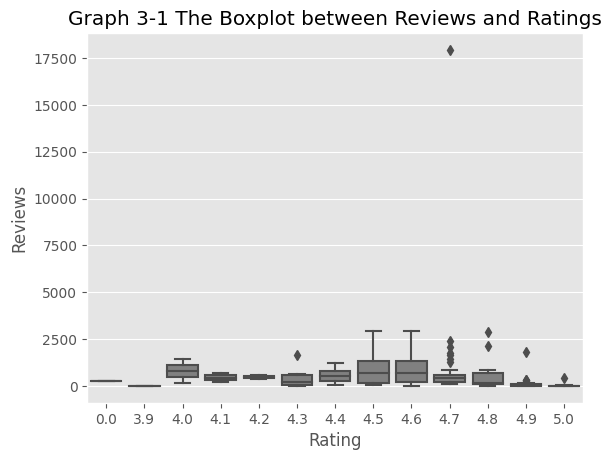

In [89]:
sns.boxplot(data=df, y='Reviews',x='Rating',color='gray').set(title='Graph 3-1 The Boxplot between Reviews and Ratings');

In [90]:
outlier = df['Reviews'] == df['Reviews'].max()
df_remove = df[~outlier]

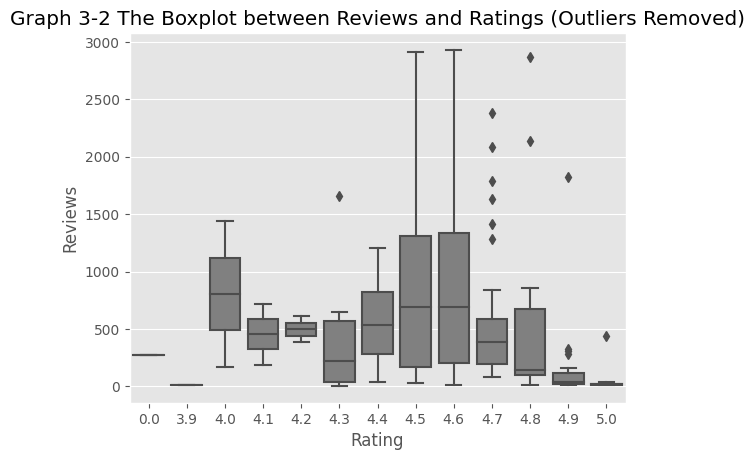

In [91]:
sns.boxplot(data=df_remove, y='Reviews',x='Rating',color='gray').set(title='Graph 3-2 The Boxplot between Reviews and Ratings (Outliers Removed)');

### Make changes to enable modeling

Finally, to enable model fitting, I have made the following changes:
- Remove the Place name column because it has unique values, so we won't use that feature.
- Convert all the categorical variables into numeric variables
- Remove one outlier where the review is above 17500
- Apply log transformation to the target variable

In [92]:
df = df.drop(columns=['Place name'])
outlier = df['Reviews'] == df['Reviews'].max()
df = df[~outlier]

In [93]:
from sklearn import preprocessing
features = df.drop(columns='Reviews')
X = pd.get_dummies(features, columns=['Place type','Price','Region','Delivery option','Dine in option','Takeout option'])
y = np.log(df['Reviews'])

## Task 5

Predicting the number of reviews a store will get is a **regression problem** in machine learning. 

In [94]:
#import ML models and peformance metrics
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [95]:
# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Task 6
Baseline Model - Linear Regression Model

In [96]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr =lr.predict(X_test)

## Task 7
Comparision Model - Random Forest Model

In [97]:
# Create Decision Tree classifer object
rf = RandomForestRegressor()
rf = rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

## Task 8
I am choosing the **Linear Regression model** as a baseline model because it is simple and efficient to train and interpret. The comparison model I am choosing is the **Random Forest model** because it can capture more complex relationship between the input features and the target variables.

## Task 9 

I am choosing **root mean squared error (RMSE)** to evaluate the model because it is commonly used and easy to interpret because it is using the same unit as the target variable. Root mean squared error is the roof of the average squared distance between the predicted values and true values. 


### Evaluating Linear Regression Model

In [98]:
mse_l = mean_squared_error(np.exp(y_test), np.exp(y_pred_lr))
print(np.sqrt(mse_l))

894.1386883708495


### Evaluating Random Forest Model

In [99]:
mse_r = mean_squared_error(np.exp(y_test), np.exp(y_pred_rf))
print(np.sqrt(mse_r))

560.3349165633612


## Task 10
A smaller RMSE value indicates the model has smaller errors in prediction. 

Therefore, **Random Forest model** is performing better at predicting the number of reviews a store will get than Linear Regression Model based on this metric. 

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam